In [70]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 300
pd.options.display.float_format = "{:.2f}".format

seed = 420
tf.random.set_seed(seed)
np.random.seed(seed)


print("Imported modules.")

Imported modules.


In [71]:
dataFrame = pd.read_csv("bodyfat.csv")
dataFrame = dataFrame.reindex(np.random.permutation(dataFrame.index))

#add bmi feature cross
dataFrame['BMI'] = dataFrame['Weight'] * dataFrame['Weight']
dataFrame['BMI'] = dataFrame['BMI'] / dataFrame['Height']
dataFrame['StaticWaistRatio'] = (dataFrame['Ankle'] + dataFrame['Knee'] + dataFrame['Wrist'])/dataFrame['Abdomen']
dataFrame['ChestWaistRatio'] = dataFrame['Chest'] / dataFrame['Abdomen']
dataFrame['HipThighRatio'] = dataFrame['Hip'] / dataFrame['Thigh']

dataFrame = dataFrame.drop(columns=['Density', 'Height', 'Weight', 'Abdomen','Chest','Hip','Thigh','Knee','Ankle','Biceps','Forearm'])

print("Data set loaded. Num examples: ", len(dataFrame))

trainDF = dataFrame.sample(frac = 0.8)
testDF = dataFrame.drop(trainDF.index)

print("Made training and test sets")

dataFrame.describe()

Data set loaded. Num examples:  252
Made training and test sets


,BodyFat,Age,Neck,Wrist,BMI,StaticWaistRatio,ChestWaistRatio,HipThighRatio
count,252.00,252.00,252.00,252.00,252.00,252.00,252.00,252.00
mean,19.15,44.88,37.99,18.23,468.75,0.87,1.09,1.69
std,8.37,12.60,2.43,0.93,169.55,0.07,0.06,0.07
min,0.00,22.00,31.10,15.80,206.50,0.65,0.92,1.45
25%,12.47,35.75,36.40,17.60,360.65,0.82,1.06,1.64
50%,19.20,43.00,38.00,18.30,433.20,0.87,1.09,1.69
75%,25.30,54.00,39.42,18.80,539.18,0.92,1.13,1.73
max,47.50,81.00,51.20,21.40,1825.30,1.07,1.27,1.87


In [72]:
# Keras Input tensors of float values.
inputs = {
    'Age':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Age'),
    'BMI':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='BMI'),
    'ChestWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='ChestWaistRatio'),
    'HipThighRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='HipThighRatio'),
    'Neck':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Neck'),
    'Wrist':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='Wrist'),
    'StaticWaistRatio':
        tf.keras.layers.Input(shape=(1,), dtype=tf.float32,
                              name='StaticWaistRatio')
}

buckets = 20
#Normalise


bmi_boundaries = np.linspace(210,2000, buckets)

bmi = tf.keras.layers.Normalization(
    name = 'normalization_BMI',
    axis=None)
bmi.adapt(trainDF['BMI'])
bmi = bmi(inputs.get('BMI'))

bmi = tf.keras.layers.Discretization(
    bin_boundaries=bmi_boundaries,
    name='discretization_bmi')(bmi)





age_boundaries = [0, 30, 40, 50, 60, 70, float('inf')]

age = tf.keras.layers.Normalization(
    name = 'normalization_age',
    axis=None)
age.adapt(trainDF['Age'])
age = age(inputs.get('Age'))

age = tf.keras.layers.Discretization(
    bin_boundaries=age_boundaries,
    name='discretization_age')(age)





chestwaistratio_boundaries = np.linspace(0.8,1.4, buckets)

chestwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_chestwaistratio',
    axis=None)
chestwaistratio.adapt(trainDF['ChestWaistRatio'])
chestwaistratio = chestwaistratio(inputs.get('ChestWaistRatio'))

chestwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=chestwaistratio_boundaries,
    name='discretization_chestwaistratio')(chestwaistratio)





hipthighratio_boundaries = np.linspace(1.5,2, buckets)

hipthighratio = tf.keras.layers.Normalization(
    name = 'normalization_hipthighratio',
    axis=None)
hipthighratio.adapt(trainDF['HipThighRatio'])
hipthighratio = hipthighratio(inputs.get('HipThighRatio'))

hipthighratio = tf.keras.layers.Discretization(
    bin_boundaries=hipthighratio_boundaries,
    name='discretization_hipthighratio')(hipthighratio)




neck_boundaries = np.linspace(31,55, buckets)

neck = tf.keras.layers.Normalization(
    name = 'normalization_neck',
    axis=None)
neck.adapt(trainDF['Neck'])
neck = neck(inputs.get('Neck'))

neck = tf.keras.layers.Discretization(
    bin_boundaries=neck_boundaries,
    name='discretization_neck')(neck)




wrist_boundaries = np.linspace(15,22, buckets)

wrist = tf.keras.layers.Normalization(
    name = 'normalization_wrist',
    axis=None)
wrist.adapt(trainDF['Wrist'])
wrist = wrist(inputs.get('Wrist'))

wrist = tf.keras.layers.Discretization(
    bin_boundaries=wrist_boundaries,
    name='discretization_wrist')(wrist)



#staticwaist
staticwaistratio_boundaries = np.linspace(0.5,1.2, buckets)

staticwaistratio = tf.keras.layers.Normalization(
    name = 'normalization_staticwaistratio',
    axis=None)
staticwaistratio.adapt(trainDF['StaticWaistRatio'])
staticwaistratio = staticwaistratio(inputs.get('StaticWaistRatio'))

staticwaistratio = tf.keras.layers.Discretization(
    bin_boundaries=staticwaistratio_boundaries,
    name='discretization_staticwaistratio')(staticwaistratio)

# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(list(inputs.values()))

print("Preprocessing layers defined.")

Preprocessing layers defined.


In [73]:
#@title Define the plotting function.

def plot_the_loss_curve(epochs, mse_training, mse_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.yscale("log")  # Set y-axis scale to logarithmic

    plt.plot(epochs, mse_training, label="Training Loss")
    plt.plot(epochs, mse_validation, label="Validation Loss")

    merged_mse_lists = mse_training.tolist() + mse_validation
    highest_loss = max(merged_mse_lists)
    lowest_loss = min(merged_mse_lists)
    top_of_y_axis = highest_loss * 1.03
    bottom_of_y_axis = lowest_loss * 0.97

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.legend()
    plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [74]:
#@title Define functions to create and train a linear regression model
def create_model(my_inputs, my_outputs, my_learning_rate, l2_regularization):
    """Create and compile a simple linear regression model."""
    model = tf.keras.Model(inputs=my_inputs, outputs=my_outputs)

    # Add L2 regularization to all trainable weights in the model.
    regularizer = tf.keras.regularizers.l2(l2_regularization)
    for layer in model.layers:
        for attr in ['kernel_regularizer', 'bias_regularizer']:
            if hasattr(layer, attr):
                setattr(layer, attr, regularizer)

    # Construct the layers into a model that TensorFlow can execute.
    model.compile(optimizer=tf.keras.optimizers.Adam(
        learning_rate=my_learning_rate),
        loss="mean_squared_error",
        metrics=[tf.keras.metrics.MeanSquaredError()])

    return model

# Create Normalization layers
train_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
train_bodyfat_normalized.adapt(
    np.array(trainDF['BodyFat']))

test_bodyfat_normalized = tf.keras.layers.Normalization(axis=None)
test_bodyfat_normalized.adapt(
    np.array(testDF['BodyFat']))

def train_model(model, dataset, epochs, batch_size, label_name, patienceNo, validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = train_bodyfat_normalized(
        np.array(features.pop(label_name)))
    # Define the early stopping criteria
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patienceNo, mode='min')
    history = model.fit(x=features, y=label, batch_size=batch_size,
                        epochs=epochs, shuffle=True, callbacks=[early_stopping], validation_split=validation_split)

    # Get details that will be useful for plotting the loss curve.
    epochs = history.epoch
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse, history.history

print("Defined the create_model and train_model functions.")

Defined the create_model and train_model functions.


In [75]:
#@title Define linear regression model outputs
def get_outputs_linear_regression():
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(preprocessing_layers)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }
  return outputs

In [76]:
def get_outputs_dnn():
  # Create a Dense layer with 20 nodes.
  dense_output = tf.keras.layers.Dense(units=13, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_1')(preprocessing_layers)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=10, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_2')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=7, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_3')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=5, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_4')(dense_output)
  # Create a Dense layer with 12 nodes.
  dense_output = tf.keras.layers.Dense(units=3, input_shape=(1,),
                              activation='relu',
                              name='hidden_dense_layer_5')(dense_output)
  # Create the Dense output layer.
  dense_output = tf.keras.layers.Dense(units=1, input_shape=(1,),
                              name='dense_output')(dense_output)

  # Define an output dictionary we'll send to the model constructor.
  outputs = {
    'dense_output': dense_output
  }

  return outputs

Epoch 1/2000
4/4 [==============================] - 1s 63ms/step - loss: 998.0889 - mean_squared_error: 998.0889 - val_loss: 626.0009 - val_mean_squared_error: 626.0009
Epoch 2/2000
4/4 [==============================] - 0s 11ms/step - loss: 625.8301 - mean_squared_error: 625.8301 - val_loss: 384.5353 - val_mean_squared_error: 384.5353
Epoch 3/2000
4/4 [==============================] - 0s 11ms/step - loss: 379.3506 - mean_squared_error: 379.3506 - val_loss: 212.1308 - val_mean_squared_error: 212.1308
Epoch 4/2000
4/4 [==============================] - 0s 11ms/step - loss: 206.1665 - mean_squared_error: 206.1665 - val_loss: 99.5540 - val_mean_squared_error: 99.5540
Epoch 5/2000
4/4 [==============================] - 0s 11ms/step - loss: 94.9354 - mean_squared_error: 94.9354 - val_loss: 35.1597 - val_mean_squared_error: 35.1597
Epoch 6/2000
4/4 [==============================] - 0s 11ms/step - loss: 34.8004 - mean_squared_error: 34.8004 - val_loss: 9.7680 - val_mean_squared_error: 9.768

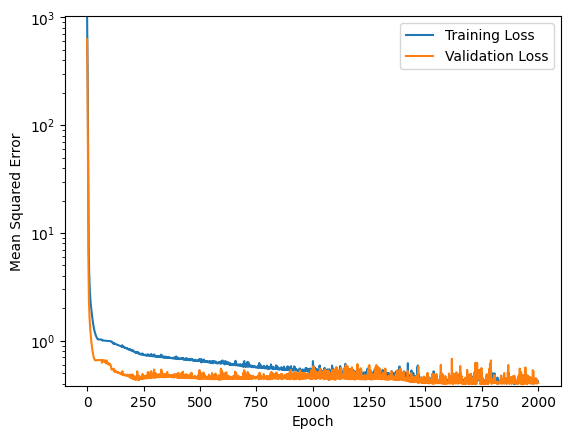


 Evaluate the new model against the test set:
1/1 [==============================] - 0s 26ms/step - loss: 0.3797 - mean_squared_error: 0.3797


{'loss': 0.37970393896102905, 'mean_squared_error': 0.37970393896102905}

In [77]:
# The following variables are the hyperparameters.
learning_rate = 0.001
epochs = 2000
batch_size = 50
l2_regularization = 0.01
patience = 100

# Specify the label
label_name = "BodyFat"

# Split the original training set into a reduced training set and a
# validation set.
validation_split = 0.1

dnn_outputs = get_outputs_dnn()

# Establish the model's topography.
my_model = create_model(
    inputs,
    dnn_outputs,
    learning_rate, l2_regularization)

# Train the model on the normalized training set. We're passing the entire
# normalized training set, but the model will only use the features
# defined in our inputs.
epochs, mse, history = train_model(my_model, trainDF, epochs,
                                   batch_size, label_name, patience, validation_split)
plot_the_loss_curve(epochs, mse, history["val_mean_squared_error"])

# After building a model against the training set, test that model
# against the test set.
test_features = {name:np.array(value) for name, value in testDF.items()}
test_label = test_bodyfat_normalized(np.array(test_features.pop(label_name))) # isolate the label

print("\n Evaluate the new model against the test set:")
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size, return_dict=True)

In [80]:
#Output weights
input_layer = my_model.layers[8]
weights, biases = input_layer.get_weights()

weights_table = pd.DataFrame(columns=['Feature', 'Total Weight'])

for feature, i in zip(inputs, weights):
    for j in i:
        j = abs(j)
        if feature not in weights_table['Feature'].values:
            row = pd.DataFrame({'Feature': feature, 'Total Weight': j}, index=[0])
            weights_table = pd.concat([weights_table, row], ignore_index=True)
        else:
            condition = weights_table['Feature'] == feature
            index = weights_table.loc[condition, 'Total Weight'].index
            weights_table.loc[condition, 'Total Weight'] = weights_table.loc[condition, 'Total Weight'][index] + j

weights_table = weights_table.sort_values(by='Total Weight', ascending=False)
weights_table


,Feature,Total Weight
2,ChestWaistRatio,4.99
6,StaticWaistRatio,4.80
4,Neck,4.63
3,HipThighRatio,4.36
5,Wrist,3.74
0,Age,3.24
1,BMI,2.62


In [81]:
# Create an empty DataFrame to store the results
result_table = pd.DataFrame(columns=['Row', 'Predicted Body Fat', 'Correct Body Fat', 'Difference +-'])

# Get the mean and variance from the normalization layer
mean = train_bodyfat_normalized.mean.numpy()
variance = train_bodyfat_normalized.variance.numpy()

# Get the minimum and maximum values of the original body fat data
min_value = trainDF['BodyFat'].min()
max_value = trainDF['BodyFat'].max()

# Iterate over the rows of the test dataframe
for index, row in testDF.iterrows():
    test_features = {name: np.array([value]) for name, value in row.items() if name != 'BodyFat'}

    # Get the correct label for the current row
    correct_label = np.array([row['BodyFat']])
    correct_label_normalized = (correct_label - mean) / np.sqrt(variance)

    # Make predictions using the model
    predictions = my_model.predict(test_features, verbose=0)

    predicted_bodyfat_normalized = predictions['dense_output'][0][0]
    predicted_bodyfat = (predicted_bodyfat_normalized * np.sqrt(variance)) + mean
    predicted_bodyfat = np.round(predicted_bodyfat, decimals=1)

    actual_bodyfat = np.round((correct_label_normalized * np.sqrt(variance)) + mean, decimals=1)
    difference = np.round(predicted_bodyfat - actual_bodyfat, 1)
    row_data = pd.DataFrame({'Row': [index],
                             'Predicted Body Fat': [predicted_bodyfat],
                             'Correct Body Fat': [actual_bodyfat],
                             'Difference +-': [difference]})

    # Concatenate the row DataFrame to the result_table
    result_table = pd.concat([result_table, row_data], ignore_index=True)

pd.options.display.max_rows = 100
result_table

,Row,Predicted Body Fat,Correct Body Fat,Difference +-
0,164,[23.9],[27.3],[-3.4]
1,66,[14.5],[21.5],[-7.0]
2,180,[24.6],[26.6],[-2.0]
3,148,[7.8],[5.3],[2.5]
4,0,[12.4],[12.3],[0.1]
5,120,[26.2],[27.9],[-1.7]
6,49,[8.2],[4.0],[4.2]
7,127,[12.6],[17.4],[-4.8]
8,219,[15.7],[15.0],[0.7]
9,189,[21.8],[24.4],[-2.6]
